### Laboratorio 2
---

In [107]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#### Problema 1

In [3]:
def binarizacion(imagen):
    img = cv.imread(imagen, cv.COLOR_BGR2RGB) # se carga la imagen y se convierte a RGB
    alto = img.shape[0] # se obtienen el ancho y alto de la imagen
    ancho = img.shape[1]

    bin = np.zeros((alto,ancho,1)) # se crea un vector de ceros

    for i in range(0, alto):
        for j in range(0,ancho): #se recorre pixel por pixel
            pixel = img[i,j]

            rojo = pixel[0] # Se guarda cada valor de canal por pixel
            verde = pixel[1]
            azul = pixel[2]
            
            bin[i,j] = 0.3*rojo + 0.59*verde + 0.11*azul # se hace la ponderación para escala de grises

            if(bin[i,j] > 100): # se aplica un umbral para la binarización
                bin[i,j] = 255
            else:
                bin[i, j] = 0
                
    plt.imshow(bin, cmap="gray") # se muestra la imagen

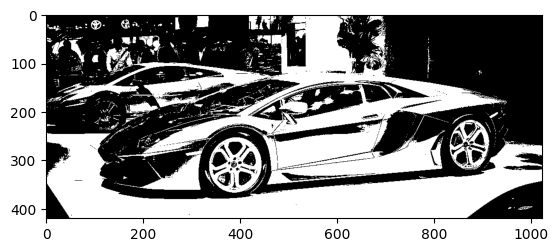

In [4]:
binarizacion("carro.jpg")

#### Problema 2

In [127]:
def operaciones(imagen1, imagen2):
    img1 = cv.imread(imagen1) # se carga la iamgen
    img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB) # se convierte a RGB
    img1 = cv.resize(img1,(320,288)) # se establece un tamaño a la imagen
    img2 = cv.imread(imagen2)
    img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
    img2 = cv.resize(img2,(320,288))

    alto = img1.shape[0] # se obtienen el ancho y alto de la imagen
    ancho = img1.shape[1]

    img1 = img1/255 # se normaliza el valor de los pixeles
    img2 = img2/255

    suma = np.zeros_like(img1)
    resta = np.zeros_like(img1)
    bin1 = np.zeros((alto,ancho,1))
    bin2 = np.zeros((alto,ancho,1))
    binand = np.zeros((alto,ancho,1))
    binor = np.zeros((alto,ancho,1))
    binxor = np.zeros((alto,ancho,1))

    for i in range(0, alto):
        for j in range(0,ancho): #se recorre pixel por pixel
            suma[i,j]= img1[i,j] + img2[i,j]
            if suma[i,j,0] > 1: # si el valor del pixel es mayor a 1, se trunca el valor a 1
                suma[i,j,0]=1
            if suma[i,j,1] > 1:
                suma[i,j,1]=1
            if suma[i,j,2] > 1:
                suma[i,j,2]= 1

            resta[i,j]= img2[i,j] - img1[i,j]
            if resta[i,j,0] < 0: # si el valor del pixel es menor a 0, se trunca el valor a 0
                resta[i,j,0]= 0
            if resta[i,j,1] < 0:
                resta[i,j,1]= 0
            if resta[i,j,2] < 0:
                resta[i,j,2]= 0

            #binarización

            pixel1 = img1[i,j]
            pixel2 = img2[i,j]

            rojo1 = pixel1[0] # Se guarda cada valor de canal por pixel
            rojo2 = pixel2[0]
            verde1 = pixel1[1]
            verde2 = pixel2[1]
            azul1 = pixel1[2]
            azul2 = pixel2[2]

            bin1[i,j] = 0.3*rojo1 + 0.59*verde1 + 0.11*azul1 # se hace la ponderación para escala de grises
            bin2[i,j] = 0.3*rojo2 + 0.59*verde2 + 0.11*azul2

            if(bin1[i,j] > 0.59): # se aplica un umbral para la binarización
                bin1[i,j] = 1
            else:
                bin1[i, j] = 0
            

            if(bin2[i,j] > 0.59): # se aplica un umbral para la binarización
                bin2[i,j] = 1
            else:
                bin2[i, j] = 0

            # Operación AND
            binand[i,j]= bin1[i,j] * bin2[i,j]

            # Operación OR
            binor[i,j]= bin1[i,j] + bin2[i,j]
            if (binor[i,j] > 1): # si el valor del pixel es mayor a 1, se trunca el valor a 1
                binor[i,j]= 1

            # Operación XOR
            binxor[i,j]= (bin1[i,j] != bin2[i,j]).sum()

    plt.title("Suma de imágenes")
    plt.imshow(suma)
    plt.show()
    plt.title("Resta de imágenes")
    plt.imshow(resta)
    plt.show()
    plt.title("Imagen 1 binaria")
    plt.imshow(bin1, cmap="gray")
    plt.show()
    plt.title("Imagen 2 binaria")
    plt.imshow(bin2, cmap="gray")
    plt.show()
    plt.title("Operación AND")
    plt.imshow(binand, cmap="gray")
    plt.show()
    plt.title("Operación OR")
    plt.imshow(binor, cmap="gray")
    plt.show()
    plt.title("Operación XOR")
    plt.imshow(binxor, cmap="gray")
    plt.show()

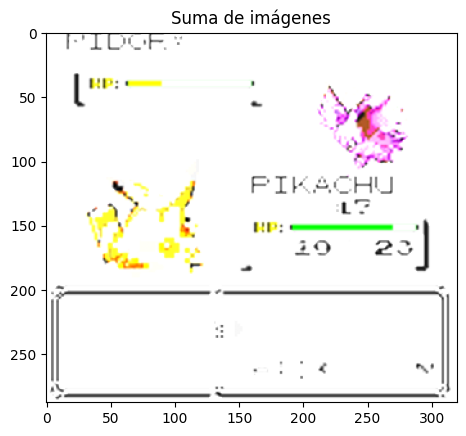

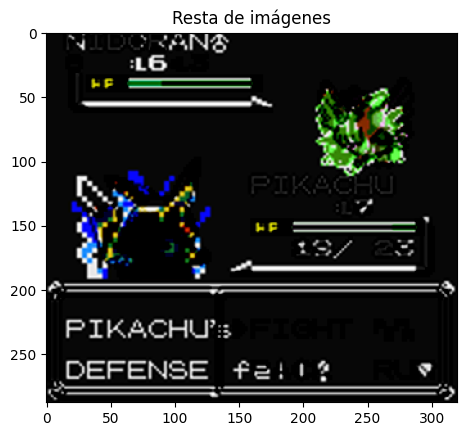

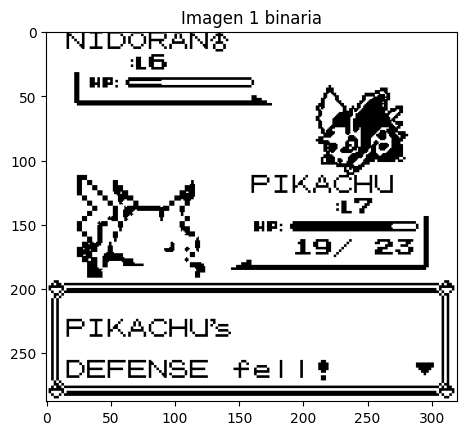

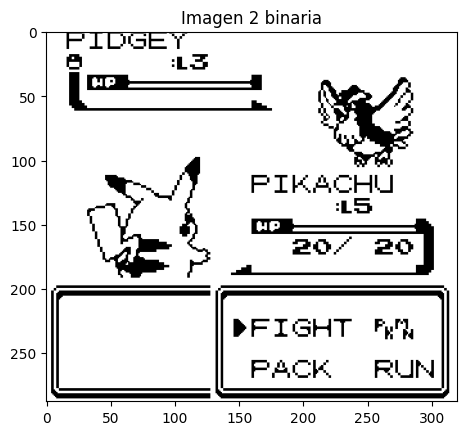

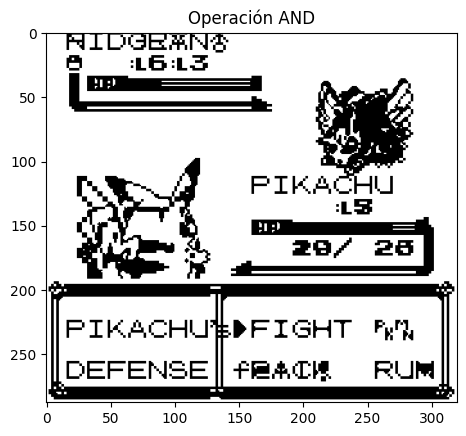

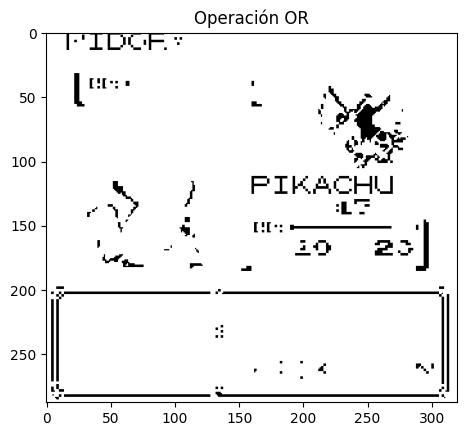

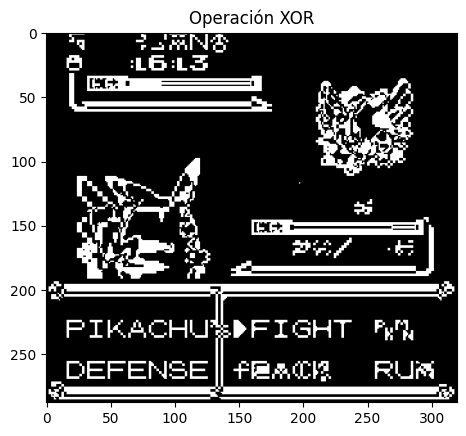

In [128]:
operaciones("pokemon1.jpg", "pokemon4.jpg")

#### Problema 3

In [149]:
def tresde(imagen):
    img = cv.imread(imagen) # se carga la imagen y se convierte a RGB
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    alto = img.shape[0] # se obtienen el ancho y alto de la imagen
    ancho = img.shape[1]

    gris = np.zeros((alto,ancho,1)) # se crea un vector de ceros

    for i in range(0, alto):
        for j in range(0,ancho): #se recorre pixel por pixel
            pixel = img[i,j]

            rojo = pixel[0] # Se guarda cada valor de canal por pixel
            verde = pixel[1]
            azul = pixel[2]
                
            gris[i,j] = 0.3*rojo + 0.59*verde + 0.11*azul # se hace la ponderación para escala de grises


    plt.imshow(gris, cmap="gray")
    plt.show()
    
    x,y = np.meshgrid(range(gris.shape[1]), range(gris.shape[0]))
    ax = plt.axes(projection="3d")
    ax.plot_surface(x,y,gris[:,:,0], cmap="gray", linewidth =0) # se grafica el espacio de la imagen
    ax.view_init(50,40)
    plt.show()

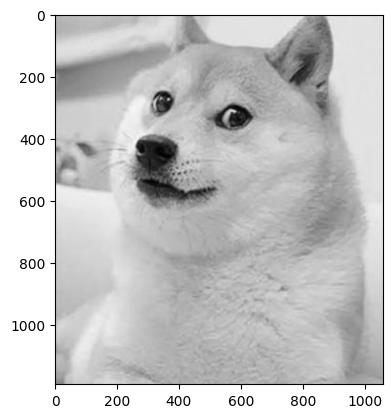

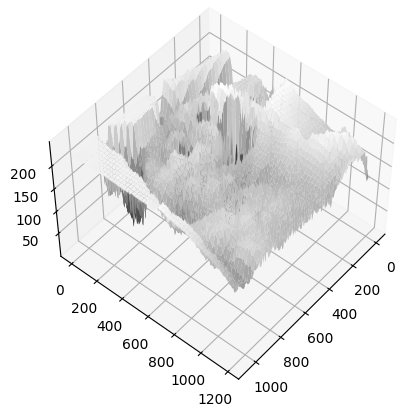

In [150]:
tresde("cheems.jpg")

#### Problema 4

In [105]:
# Transformación negativa
def negativa(imagen):
    img1 = cv.imread(imagen,cv.IMREAD_GRAYSCALE) # se carga la iamgen
    neg = 255 - img1 # se invierten los valores de todos los pixeles
    plt.title("Original")
    plt.imshow(img1, cmap="gray")
    plt.show()
    plt.title("Negativa")
    plt.imshow(neg, cmap="gray")

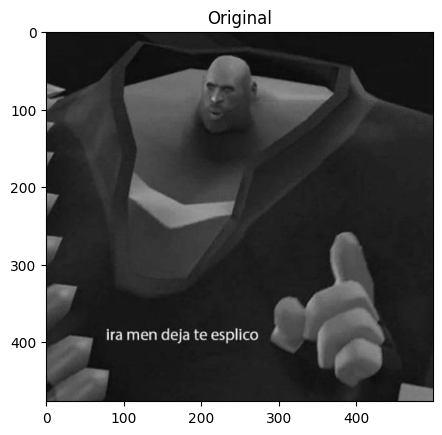

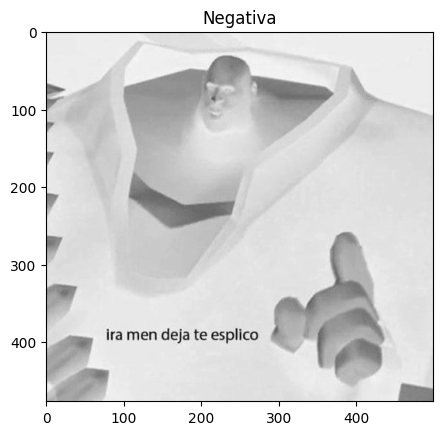

In [133]:
negativa("iramen.jpg")

In [160]:
# Transformación Lineal
def lineal(imagen, alpha, beta):
    img = cv.imread(imagen) # se carga la iamgen
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    alto = img.shape[0]
    ancho = img.shape[1]

    img = img/255

    alpha = alpha
    beta = beta

    lineal = np.zeros((alto, ancho,3))

    for i in range(0, alto):
        for j in range(0,ancho): #se recorre pixel por pixel
            lineal[i,j] = alpha*img[i,j]+beta

            if (lineal[i,j,0] > 1):
                lineal[i,j,0] = 1
            if (lineal[i,j,1] > 1):
                lineal[i,j,1] = 1
            if (lineal[i,j,2] > 1):
                lineal[i,j,2] = 1

    plt.title("Original")
    plt.imshow(img)
    plt.show()
    plt.title("Lineal")
    plt.imshow(lineal)

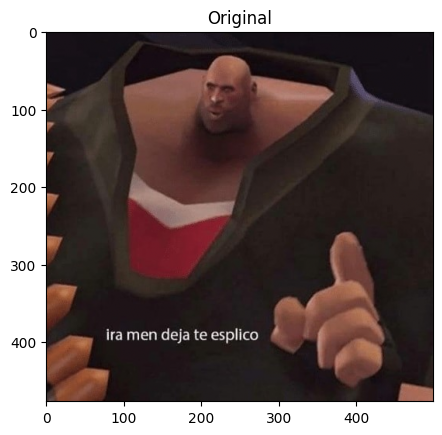

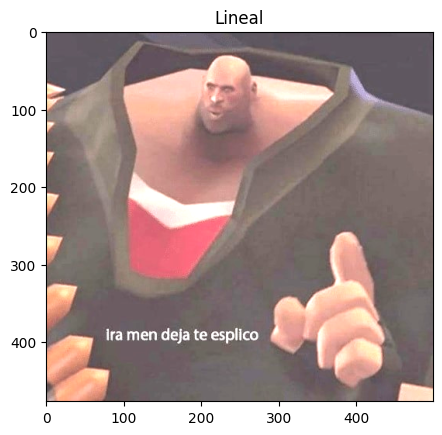

In [161]:
lineal("iramen.jpg", 1.5, 0.25)

In [162]:
# Transformación logarítmica
def logaritmica(imagen, alpha):
    img = cv.imread(imagen) # se carga la iamgen
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    alto = img.shape[0]
    ancho = img.shape[1]

    img = img/255

    alpha = alpha


    loga = np.zeros((alto, ancho,3))

    for i in range(0, alto):
        for j in range(0,ancho): #se recorre pixel por pixel
            loga[i,j] = alpha*(np.log(img[i,j]+1))

            if (loga[i,j,0] > 1):
                loga[i,j,0] = 1
            if (loga[i,j,1] > 1):
                loga[i,j,1] = 1
            if (loga[i,j,2] > 1):
                loga[i,j,2] = 1

    plt.title("Original")
    plt.imshow(img)
    plt.show()
    plt.title("Logarítmica")
    plt.imshow(loga)

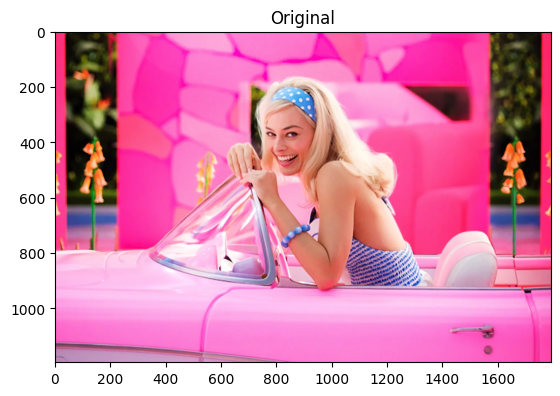

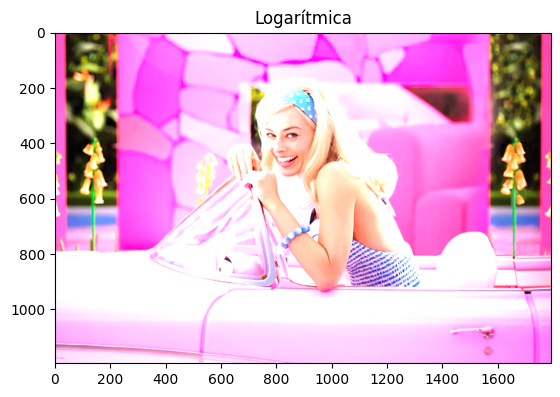

In [163]:
logaritmica("barbie.jpg",2)

In [165]:
# Transformación exponencial
def exponencial(imagen, alpha, gamma):
    img = cv.imread(imagen) # se carga la iamgen
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    alto = img.shape[0]
    ancho = img.shape[1]

    img = img/255

    alpha = alpha
    gamma = gamma


    expo = np.zeros((alto, ancho,3))

    for i in range(0, alto):
        for j in range(0,ancho): #se recorre pixel por pixel
            expo[i,j] = alpha*(img[i,j])**gamma

            if (expo[i,j,0] > 1):
                expo[i,j,0] = 1
            if (expo[i,j,1] > 1):
                expo[i,j,1] = 1
            if (expo[i,j,2] > 1):
                expo[i,j,2] = 1

    plt.title("Original")
    plt.imshow(img)
    plt.show()
    plt.title("Exponencial")
    plt.imshow(expo)

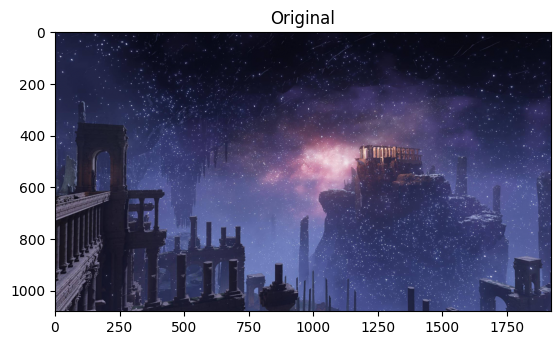

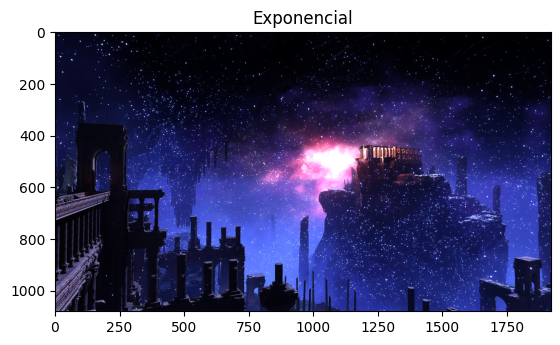

In [168]:
exponencial("elden.jpg", 2, 2)

#### Problema 5

In [207]:
def filtro(imagen, kernel, filtro):
    img = cv.imread(imagen, cv.IMREAD_GRAYSCALE) # se carga la imagen
    alto = img.shape[0]
    ancho = img.shape[1]

    expo = np.zeros((alto, ancho))

    gauss3 = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
    gauss5 = np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])/256
    gauss7 = np.array([[1,6,15,20,15,6,1], [6,36,90,120,90,36,6], [15,90,225,300,225,90,15], [20,120,300,400,300,120,20],
                    [15,90,225,300,225,90,15], [6,36,90,120,90,36,6], [1,6,15,20,15,6,1]])/4096
    gauss9 = np.array([[1, 8, 28, 56, 70, 56, 28, 8, 1], [8, 64, 224, 448, 560, 448, 224, 64, 8], [28, 224, 784, 1568, 1960, 1568, 784, 224, 28],
            [56, 448, 1568, 3136, 3920, 3136, 1568, 448, 56], [70, 560, 1960,3920 ,4900 ,3920 ,1960 ,560 ,70], [56 ,448 ,1568 ,3136 ,3920 ,3136 ,1568 ,448 ,56],
            [28 ,224 ,784 ,1568 ,1960 ,1568 ,784 ,224 ,28], [8 ,64 ,224 ,448 ,560 ,448 ,224 ,64 ,8], [1 ,8 ,28 ,56 ,70 ,56 ,28 ,8 ,1]])/262144

    sharp3 = np.array([[0, -1, 0],
            [-1, 5, -1],
            [0, -1, 0]])
    sharp5 = np.array([[-1, -1, -1, -1, -1],
            [-1, 2, 2, 2, -1],
            [-1, 2, 8, 2, -1],
            [-1, 2, 2, 2, -1],
            [-1,-1,-1,-1,-1]])/8
    sharp7 = np.array([[0,-1,-1,-1,-1,-1,0],
            [-1,-2,-4,-4,-4,-2,-1],
            [-1,-4,6,20,6,-4,-1],
            [-1,-4,20,60,20,-4,-1],
            [-1,-4,6,20,6,-4,-1],
            [-1,-2,-4,-4,-4,-2,-1],
            [0 ,-1 ,-1 ,-1 ,-1 ,-1 ,0]])/60
    sharp9 = np.array([[0 ,-2 ,-3 ,-3 ,-3 ,-3 ,-3 ,-2 ,0],
            [-2 ,-4 ,-5 ,-5 ,-5 ,-5 ,-5 ,-4 ,-2],
            [-3 ,-5 ,10 ,23 ,25 ,23 ,10 ,-5 ,-3],
            [-3 ,-5 ,23 ,50 ,55 ,50 ,23 ,-5 ,-3],
            [-3 ,-5 ,25 ,55 ,63 ,55 ,25 ,-5 ,-3],
            [-3 ,-5 ,23 ,50 ,55 ,50 ,23 ,-5 ,-3],
            [-3 ,-5 ,10 ,23 ,25 ,23 ,10 ,-5 ,-3],
            [-2 ,-4 ,-5 ,-5 ,-5 ,-5 ,-5 ,-4 ,-2], 
            [0 ,-2 ,-3 ,-3 ,-3 ,-3 ,-3 ,-2 ,0]])/99

    unsharp3 = np.array([[-1, -1, -1],
            [-1, 9, -1],
            [-1, -1, -1]])
    unsharp5 =np.array([[-1, -1, -1, -1, -1],
            [-1, 1, 2, 1, -1],
            [-1, 2, 4, 2, -1],
            [-1, 1, 2, 1, -1],
            [-1,-1,-1,-1,-1]])

    laplaciano3 = np.array([[0, 1, 0],
            [1, -4, 1],
            [0, 1, 0]])
    laplaciano5 = np.array([[0, 0, -1, 0, 0],
            [0, -1, -2, -1, 0],
            [-1, -2, 16, -2, -1],
            [0, -1, -2, -1, 0],
            [0, 0, -1, 0, 0]])
    laplaciano7 = np.array([[0 ,0 ,3 ,2 ,3 ,0 ,0],
            [0 ,2 ,-12 ,-23 ,-12 ,2 ,0],
            [3 ,-12 ,-55 ,-65 ,-55 ,-12 ,3],
            [2 ,-23 ,-65 ,364 ,-65 ,-23 ,2],
            [3 ,-12 ,-55 ,-65 ,-55 ,-12 ,3],
            [0 ,2 ,-12 ,-23 ,-12 ,2 ,0],
            [0 ,0 ,3 ,2 ,3 ,0 ,0]])

    sobelx = np.array([[1, 2, 1],
            [0, 0, 0],
            [-1, -2, -1]])
    sobely = np.array([[-1, -2, -1],
            [0, 0, 0],
            [1, 2, 1]])
    
    if (kernel == 3) and (filtro == 'gauss') :
        fil = gauss3
    if (kernel == 5) and (filtro == 'gauss') :
        fil = gauss5
    if (kernel == 7) and (filtro == 'gauss') :
        fil = gauss7
    if (kernel == 9) and (filtro == 'gauss') :
        fil = gauss7

    if (kernel == 3) and (filtro == 'sharp') :
        fil = sharp3
    if (kernel == 5) and (filtro == 'sharp') :
        fil = sharp5
    if (kernel == 7) and (filtro == 'sharp') :
        fil = sharp7
    if (kernel == 9) and (filtro == 'sharp') :
        fil = sharp9

    if (kernel == 3) and (filtro == 'unsharp') :
        fil = unsharp3
    if (kernel == 5) and (filtro == 'unsharp') :
        fil = unsharp5

    if (kernel == 3) and (filtro == 'laplaciano') :
        fil = laplaciano3
    if (kernel == 5) and (filtro == 'laplaciano') :
        fil = laplaciano5
    if (kernel == 7) and (filtro == 'laplaciano') :
        fil = laplaciano7

    if (kernel == 3) and (filtro == 'sobelx') :
        fil = sobelx
    if (kernel == 3) and (filtro == 'sobely') :
        fil = sobely

    altoKernel = len(fil[:,0])
    anchoKernel = len(fil[0,:])

    step = int(len(fil[0,:])/2)

    newImg = np.zeros((alto, ancho))

    for i in range(step, alto - step):
            newPixel = 0
            for j in range(step, ancho - step):
                ventana = img[i-step:i+2*step, j-step:j+2*step]
                newPixel = 0
                for m in range(0, altoKernel):
                    for n in range(0, anchoKernel):
                        newPixel = newPixel + ventana[m, n] * fil[m, n]
                newImg[i, j] = int(newPixel)

    plt.title("Original")
    plt.imshow(img, cmap="gray")
    plt.show()
    plt.title("Filtrada")
    plt.imshow(newImg, cmap="gray")
    plt.show()


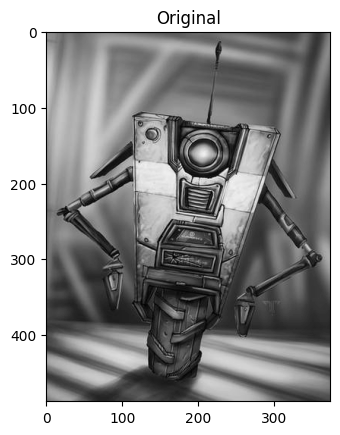

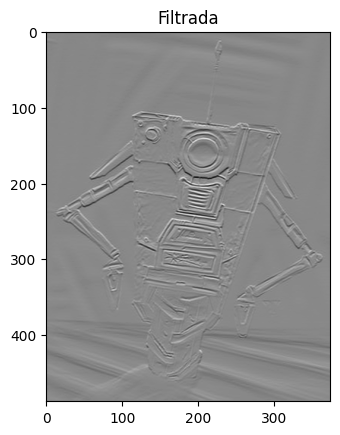

In [209]:
filtro("claptrap.jpg", 3, 'sobelx')

#### Problema 6

El kernel Laplaciano utiliza la segunda derivdada de la imagen para detectar bordes. Es útil cuando se requiere detectar cambios fuertes en la intesidad de pixeles. Sin embargo, al solo ser un filtro, es sensible al ruido en las imágenes.

En cambio el algoritmo de Canny es más robusto y realiza otros procesos antes de la detección de bordes, como el suavizado de imagen. Esto hace que el algoritmo sea menos susceptible al ruido, pero a cambio requiere de más recursos computacionales.